# Tensorflow 101
## Uso de TensorFlow para modelos de regresion lineal simple
(Por: Javier Arellano-Verdejo)

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

### Modelo de regresion lineal simple

$$ Y = WX + b $$

Si tenemos n caracteristicas la ecuación general es:

$$ Y = b + W_1X_1 + W_2X_2 + \cdots + W_nX_n $$

In [2]:
# PARÁMETROS DEL MODELO, los valores 3.0 y -2.0 son elegidos aleatoriamente, 
# estos serán optimizados durante el proceso de entrenamiento

W = tf.Variable([3.0])
b = tf.Variable([-2.0])

Ahora se crean dos placeholders los cuales contendrán los datos con que se alimentará al modelo

In [3]:
# ENTRADAS DEL MODELO

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

Ahora definimos el modelo para la ecuación:
$$ Y = WX + b $$

In [5]:
# MODEL DEFINITION

predictions = W*X + b

Definimos la función de error. El error es la diferencia entre los valores verdaderos y los
valores obtenidos por el modelo. En este caso usaremos como error la suma del cuadrado de la diferencia entre estos valores:

$$ error = \sum_{i=1}^n \left(real_i - prediccion_i\right)^2 $$

In [6]:
# LOSS FUNCTION. Aqui usamos la suma del cuadrado de los errores

loss = tf.reduce_sum(tf.square(predictions - Y))

Ahora definimos la funci{on de optimizaci{on para el sistema, en este caso vamos a utilizar el modelo del gradiente desendiente

In [9]:
# TRAINING OP, el learning rate será de 0.001 y la funci{on a minimizar es la funci{on de error 'loss'

train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

Ahora creamos algunos datos de entrenamiento para las entradas del modelo X y Y

In [11]:
# TRAIN DATA

x = [1.1,2.0,3.5,4.8]
y = [2.0,3.4,4.2,5.1]

Finalmente creamos la sesion y entrenamos el modelo

In [15]:
# SESSION AND TRAINNING

with tf.Session() as sess:
    # iniciali<zo las variables
    sess.run(tf.global_variables_initializer())
    
    for train_step in range(2000):
        sess.run(train, feed_dict = {X:x, Y:y})
        
    # obtengo los datos finales calculados por tf
    final_W, final_b, final_loss = sess.run([W, b, loss], feed_dict = {X:x, Y:y})

Muestro los valores finales para los parámetros $W$ y $b$ que han sido calculador por TensorFlow

In [16]:
print('W: %s, b: %s, loss: %s'%(final_W, final_b, final_loss))

W: [0.8422483], b: [1.2378168], loss: 0.28800032


Muestro gráficamente los datos originales y el resultado dle modelo

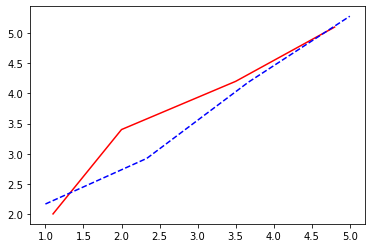

In [28]:
y_model = x*final_W + final_b

plt.plot(x, y, 'r')
plt.plot(x_model, y_model, 'b--')